In [1]:
#This notebook's goal is to compare the effect of using an analytic vs. roman PSF for SMP.
# I have found that typically, the roman PSF performs worse than the analytic PSF.
# A tale of two PSFs: It was the best of times, it was the worst of times.
import numpy as np
import matplotlib.pyplot as plt
import yaml
from AllASPFuncs import *



In [2]:
#Open the config yaml file
config = yaml.safe_load(open("config.yaml"))
#Change use_roman to False
config['use_roman'] = True
config['use_real_images'] = True
config['fetch_SED'] = False
config['SNID'] = 40120913
config['makecontourGrid'] = True
config['band'] = 'Y106'

config['adaptive_grid'] = True
config['turn_grid_off'] = False
config['testnum'] = 2
config['detim'] = 2
config['size'] = 19
config['weighting'] = True

config['bg_gal_flux'] = 1e5
config['deltafcn_profile'] = False
config['single_grid_point'] = False
config['mismatch_seds'] = False
config['noise'] = 0


#Save the result
with open("config.yaml", "w") as f:
    yaml.dump(config, f)

%run -i 'RomanASP.py'

Running the main function
All Configurations Loaded
ID: 40120913
filter Pointing SCA    date   ...  true mag  true flux  realized flux BAND
------ -------- --- --------- ... ---------- ---------- ------------- ----
  Y106    41310  10 62535.424 ... 5.52604575  6295.0702        6361.0 Y106
  Y106    41315  15  62535.45 ... 5.52659678 6291.87611        6263.0 Y106
truth in construct images simple_model
GRID SPACE 1.0
USING CONTOUR GRID
[-43.0, 35.0, 247.00000000000006, 1402.0]
Built a grid with 208 points
removed wgt when making adaptive grid
Gaussian std in getWeights 1000
ARGS IN PSF SOURCE 1790.9078872790794 2568.493029341296 41310 10 19 9.907887279079448 9.493029341295754 galsim.SED(galsim.LookupTable(x=array([ 100., 2600.]), f=array([1., 1.]), interpolant='linear'), redshift=0.0) 1
Using 1e6 photons in getPSF_Image
Confusion Metric: 721.9772594379574
In construct psf bg using flat SED
Using default SED
1790.9078872790794 2568.493029341296 9.907887279079448 9.493029341295754
ARGS IN 

In [10]:
pointing =  43623 
SCA =  7
truth = 'truth'
band = 'Y106'
ID = 50106142
cat = pd.read_csv(roman_path+f'/RomanTDS/truth/{band}/{pointing}/Roman_TDS_index_{band}_{pointing}_{SCA}.txt',\
                                sep="\s+", skiprows = 1,
                                names = ['object_id', 'ra', 'dec', 'x', 'y', 'realized_flux', 'flux', 'mag', 'obj_type'])
cat_star = cat.loc[cat['obj_type'] == 'star']
print(cat_star.columns)
ID = cat_star['object_id'].iloc[0]

#get_SED(ID, date = 62600, star = True)

df = pd.read_parquet(sn_path+'pointsource_10552.parquet', engine='fastparquet')
df['sed_filepath']

Index(['object_id', 'ra', 'dec', 'x', 'y', 'realized_flux', 'flux', 'mag',
       'obj_type'],
      dtype='object')


0                starSED/kurucz/km20_4500.fits_g00_4520.gz
1        starSED/phoSimMLT/lte034-4.5-1.0a+0.4.BT-Settl...
2        starSED/phoSimMLT/lte034-4.5-1.0a+0.4.BT-Settl...
3        starSED/phoSimMLT/lte035-4.5-1.0a+0.4.BT-Settl...
4                starSED/kurucz/km20_4500.fits_g00_4520.gz
                               ...                        
39946    starSED/phoSimMLT/lte039-6.0-0.5a+0.2.BT-Settl...
39947    starSED/phoSimMLT/lte032-4.5-1.0a+0.4.BT-Settl...
39948    starSED/phoSimMLT/lte035-5.0-1.0a+0.4.BT-Settl...
39949            starSED/kurucz/km15_5500.fits_g15_5620.gz
39950    starSED/phoSimMLT/lte034-4.5-1.0a+0.4.BT-Settl...
Name: sed_filepath, Length: 39951, dtype: object

19.698096081639633


(array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 3.000000e+00, 3.500000e+01, 2.000000e+02,
        9.170000e+02, 4.241000e+03, 1.539000e+04, 4.698900e+04,
        1.244830e+05, 2.857520e+05, 5.714320e+05, 1.249135e+06,
        1.604084e+06, 2.057868e+06, 2.319475e+06, 2.295529e+06,
        2.001592e+06, 1.538829e+06, 1.054246e+06, 6.477490e+05,
        3.588190e+05, 1.848650e+05, 9.244900e+04, 4.707800e+04,
        2.696100e+04, 1.823100e+04, 1.379300e+04, 1.127100e+04,
        9.418000e+03, 8.353000e+03, 7.184000e+03, 7.553000e+03,
        5.622000e+03, 5.047000e+03, 4.603000e+03, 4.202000e+03,
        3.867000e+03, 3.568000e+03, 3.266000e+03, 3.029000e+03,
        2.817000e+03, 2.559000e+03, 2.369000e+03, 2.291000e+03,
        2.122000e+03, 2.005000e+03, 1.924000e+03, 1.663000e+03,
        1.710000e+03, 1.576000e+03, 1.509000e+03, 1.675000e+03,
        1.367000e+03, 1.311000e+03, 1.22

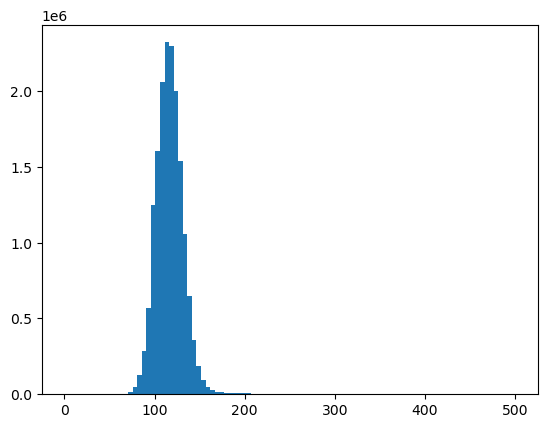

In [45]:
#
pointing =  43623 
SCA =  7
truth = 'simple_model'
band = 'Y106'
ID = 50106142
size = 7
#Open the image
image = fits.open(roman_path + f'/RomanTDS/images/{truth}/{band}/{pointing}/Roman_TDS_{truth}_{band}_{pointing}_{SCA}.fits.gz')
pqfile = find_parq(ID, sn_path)
ra, dec, p, s, start, end, peak, galra, galdec = \
    SNID_to_loc(ID, pqfile, date = True, band = band, snpath = sn_path, roman_path = roman_path, host = True)
if truth == 'truth':
    wcs = WCS(image[0].header)
    a = 0
else:
    wcs = WCS(image[1].header)
    a = 1


pixel = wcs.world_to_pixel(SkyCoord(ra=ra*u.degree, dec=dec*u.degree))

result = Cutout2D(image[a].data, pixel, size, mode = 'strict', wcs = wcs)

'''
cutout_wcs = galsim.AstropyWCS(wcs = result.wcs)
wcs = galsim.AstropyWCS(wcs = wcs)
x,y = wcs.toImage(ra,dec, units = 'deg') #this was ra and then snra below before. Should these be the same?
print(x,y)
snx, sny = cutout_wcs.toImage(ra, dec, units = 'deg')
print(snx, sny)
sed = galsim.SED(galsim.LookupTable([100, 2600], [1,1], interpolant='linear'),
                            wave_type='nm', flux_type='fphotons')
array = construct_psf_source(x, y, pointing, SCA, \
                stampsize = size, x_center = snx, y_center = sny, sed = sed)
                
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
residuals = result.data.flatten() - 92428.3053 * array

plt.imshow(residuals.reshape(size,size), cmap = 'seismic')
plt.colorbar()
plt.scatter(snx, sny, color = 'k', marker = 'x')


lam, flam = get_SED(ID, 62565.437)
sed = galsim.SED(galsim.LookupTable(lam, flam, interpolant='linear'),
                                        wave_type='Angstroms', flux_type='fphotons')
array = construct_psf_source(x, y, pointing, SCA, \
                stampsize = size, x_center = snx, y_center = sny, sed = sed)
plt.subplot(1,3,2)
residuals = result.data.flatten() - 92428.3053 * array

plt.imshow(residuals.reshape(size,size), cmap = 'seismic')
plt.colorbar()
plt.scatter(snx, sny, color = 'k', marker = 'x')

plt.subplot(1,3,3)
plt.imshow(result.data)
'''

bins = np.linspace(0, 500, 100)

print(np.std(image[1].data.flatten()[np.where(image[1].data.flatten() < 500)]))

plt.hist(image[1].data.flatten(), bins = bins)


ARGS IN PSF SOURCE 958.7807659195473 170.72852021473574 43623 7 7 3.7807659195473695 3.728520214735737 galsim.SED(galsim.LookupTable(x=array([ 1850.,  1950., ..., 24350., 24450.]), f=array([9.21843162e-19, 1.00073686e-18, ..., 6.85630726e-19, 6.75302446e-19]), interpolant='linear'), redshift=0.0) 1
Using 1e7 photons in getPSF_Image


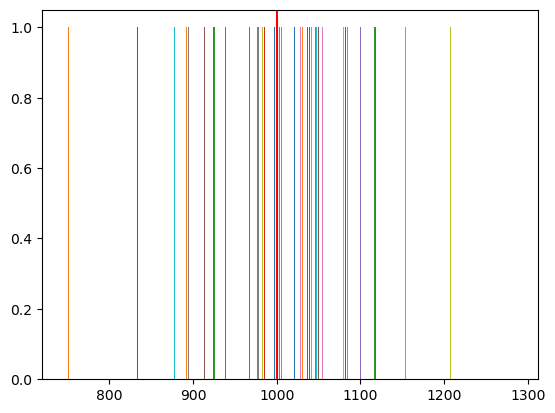

In [ ]:
#
pointing =  43623 
SCA =  7
truth = 'truth'
band = 'Y106'
ID = 50106142
size = 7
#Open the image
image = fits.open(roman_path + f'/RomanTDS/images/{truth}/{band}/{pointing}/Roman_TDS_{truth}_{band}_{pointing}_{SCA}.fits.gz')
pqfile = find_parq(ID, sn_path)
ra, dec, p, s, start, end, peak, galra, galdec = \
    SNID_to_loc(ID, pqfile, date = True, band = band, snpath = sn_path, roman_path = roman_path, host = True)
if truth == 'truth':
    wcs = WCS(image[0].header)
    a = 0
else:
    wcs = WCS(image[1].header)
    a = 1


pixel = wcs.world_to_pixel(SkyCoord(ra=ra*u.degree, dec=dec*u.degree))

result = Cutout2D(image[a].data, pixel, size, mode = 'strict', wcs = wcs)


cutout_wcs = galsim.AstropyWCS(wcs = result.wcs)
wcs = galsim.AstropyWCS(wcs = wcs)
x,y = wcs.toImage(ra,dec, units = 'deg') #this was ra and then snra below before. Should these be the same?
snx, sny = cutout_wcs.toImage(ra, dec, units = 'deg')

lam, flam = get_SED(ID, 62565.437)
sed = galsim.SED(galsim.LookupTable(lam, flam, interpolant='linear'),
                                        wave_type='Angstroms', flux_type='fphotons')
array = construct_psf_source(x, y, pointing, SCA, \
                stampsize = size, x_center = snx, y_center = sny, sed = sed)



100.0
9.0


/tmp/ipykernel_561622/782992464.py:16: RuntimeWarning: invalid value encountered in log10
  plt.hist(-2.5*np.log10(fluxes)+2.5*np.log10(truflux))
/tmp/ipykernel_561622/782992464.py:17: RuntimeWarning: invalid value encountered in log10
  stds.append(np.std(-2.5*np.log10(fluxes)+2.5*np.log10(truflux)))


250.0
8.005149978319906
625.0
7.010299956639812
1562.5
6.015449934959718
3906.25
5.020599913279623
9765.625
4.02574989159953
24414.0625
3.030899869919436
61035.15625
2.036049848239342


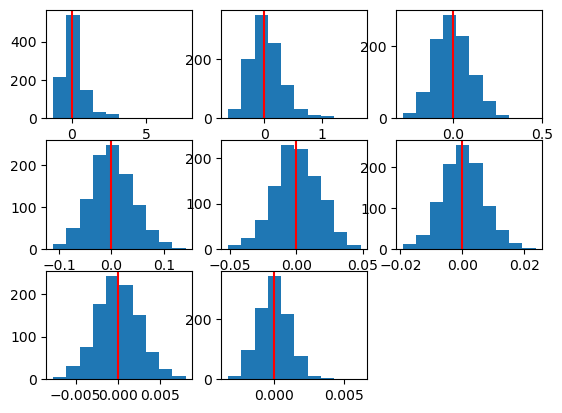

In [46]:
mags = []
stds = []
for j in range(8):
    truflux = 100 * 2.5**j
    print(truflux)
    print(-2.5*np.log10(truflux) + 14)
    mags.append(-2.5*np.log10(truflux) + 14)

    fluxes = []
    for i in range(1000):
        sim_im = array * truflux + np.random.normal(0, 20, np.size(array))
        flux = scipy.optimize.minimize(lambda x: np.sum((sim_im - x * array)**2), 1).x[0]
        fluxes.append(flux)
    fluxes = np.array(fluxes)
    plt.subplot(3,3,j+1)
    plt.hist(-2.5*np.log10(fluxes)+2.5*np.log10(truflux))
    stds.append(np.std(-2.5*np.log10(fluxes)+2.5*np.log10(truflux)))
    plt.axvline(0, color = 'r')

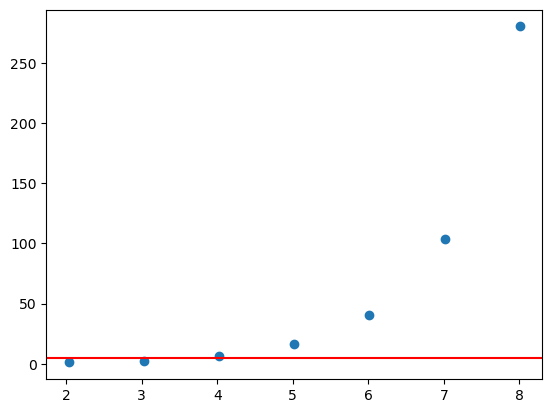

In [47]:
plt.scatter(np.array(mags),1000*np.array(stds))
plt.axhline(5, color = 'r')

/hpc/home/cfm37/RomanASP/AllASPFuncs.py:1113: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  plt.scatter(xx-1, yy-1, s = 1, c= 'k', vmin = vmin, vmax = vmax)


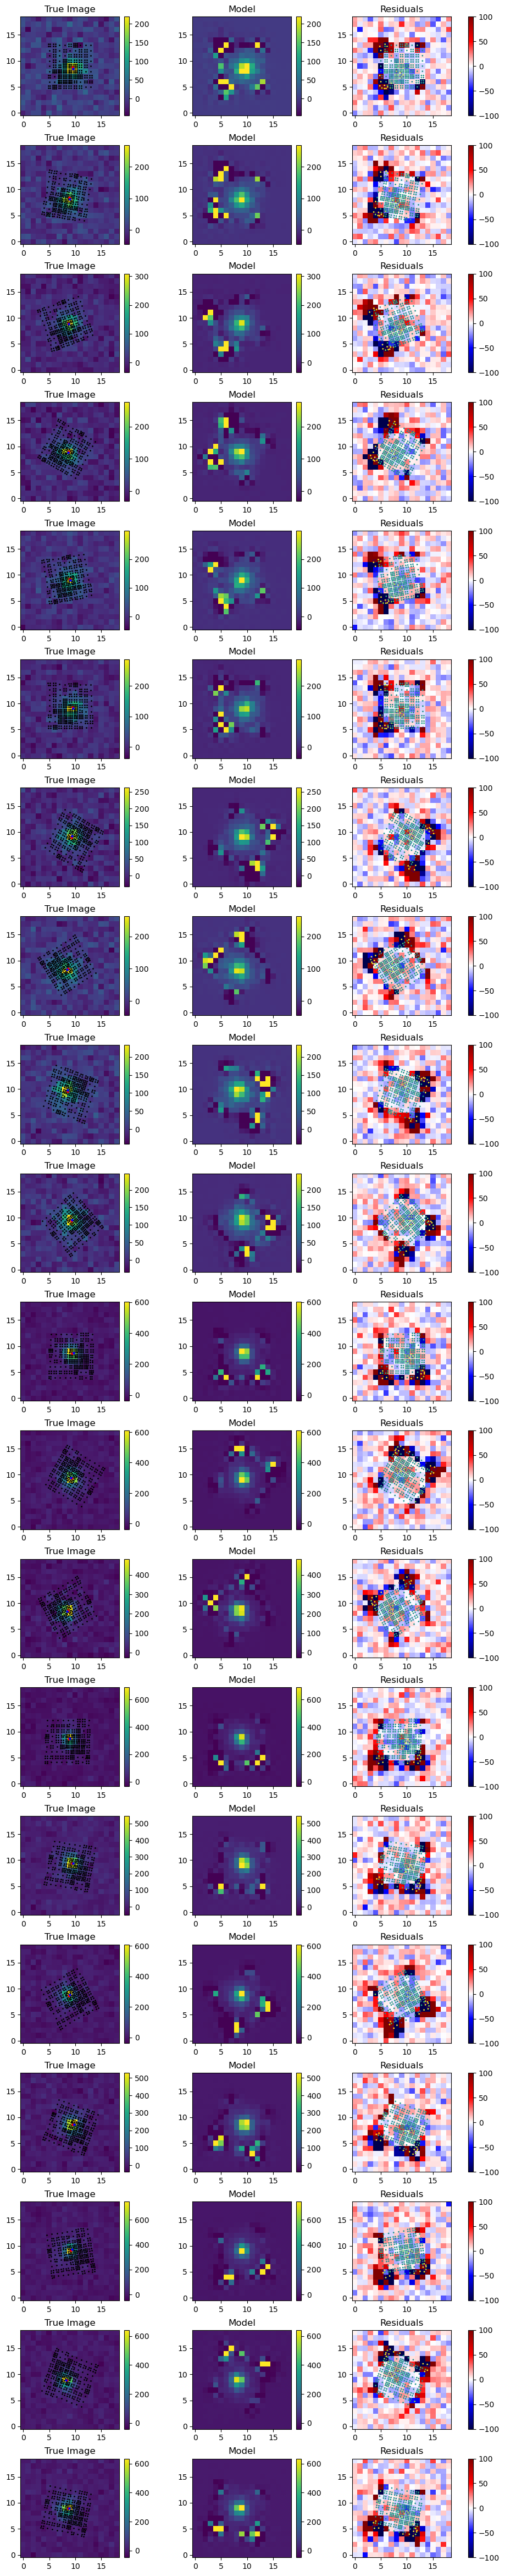

In [4]:
plot_images(f'{config["SNID"]}_Y106_romanpsf', size = 19)

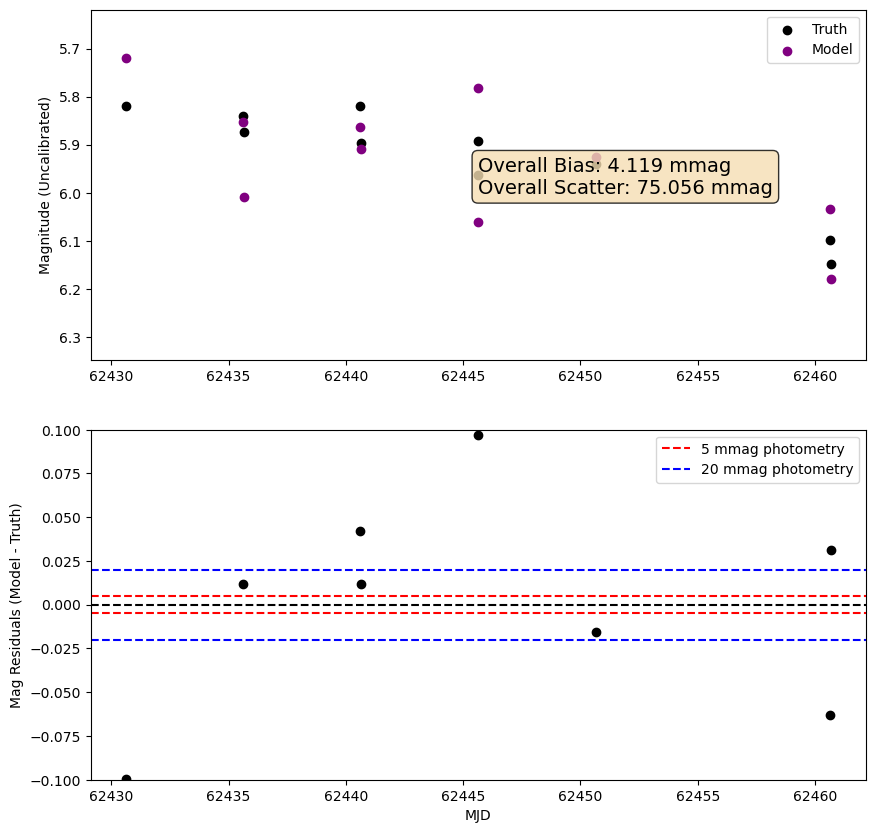

In [3]:
plot_lc(f'{config["SNID"]}_Y106_romanpsf')

In [8]:
parq_file = find_parq(config['SNID'], path = sn_path)
df = open_parq(parq_file, path = sn_path)
df.columns

Index(['id', 'ra', 'dec', 'host_id', 'gentype', 'model_name', 'start_mjd',
       'end_mjd', 'z_CMB', 'mw_EBV', 'mw_extinction_applied', 'AV', 'RV',
       'v_pec', 'host_ra', 'host_dec', 'host_mag_g', 'host_mag_i',
       'host_mag_F', 'host_sn_sep', 'peak_mjd', 'peak_mag_g', 'peak_mag_i',
       'peak_mag_F', 'lens_dmu', 'lens_dmu_applied', 'model_param_names',
       'model_param_values', 'MW_av', 'MW_rv'],
      dtype='object')

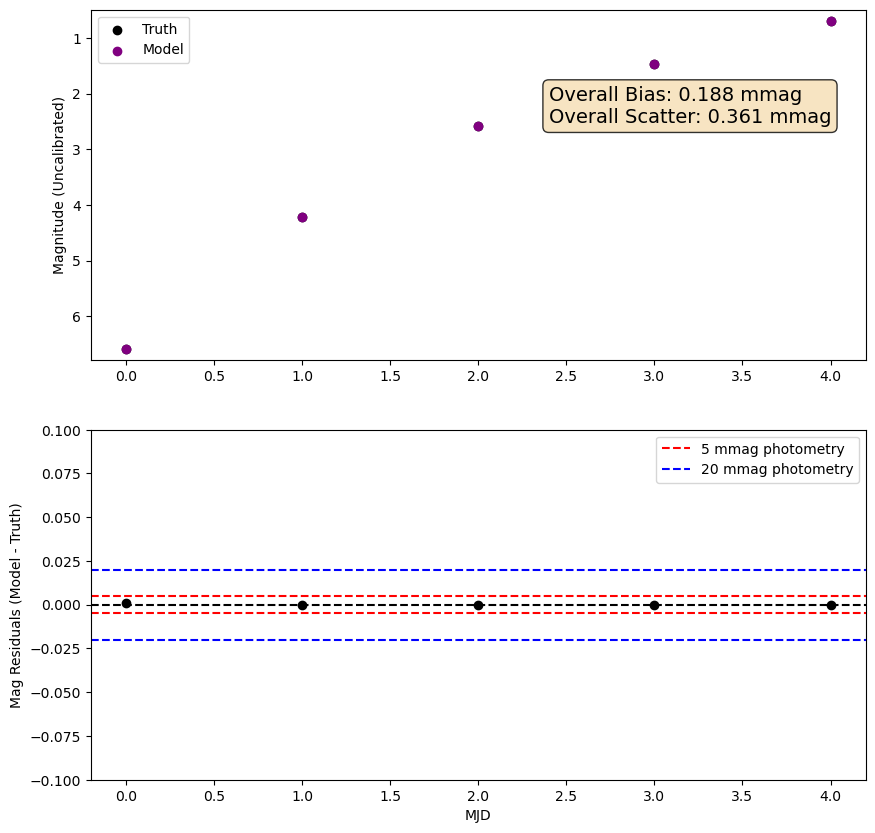

In [3]:
plot_lc('simulated_Y106_analyticpsf')

/hpc/home/cfm37/RomanASP/AllASPFuncs.py:1088: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  plt.scatter(xx, yy, s = 1, c= 'k', vmin = vmin, vmax = vmax)
/hpc/home/cfm37/RomanASP/AllASPFuncs.py:1088: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  plt.scatter(xx, yy, s = 1, c= 'k', vmin = vmin, vmax = vmax)
/hpc/home/cfm37/RomanASP/AllASPFuncs.py:1088: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  plt.scatter(xx, yy, s = 1, c= 'k', vmin = vmin, vmax = vmax)
/hpc/home/cfm37/RomanASP/AllASPFuncs.py:1088: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  plt.scatter(xx, yy, s = 1, c= 'k', vmin = vmin, vmax = vmax)
/hpc/home/cfm37/RomanASP/AllASPFuncs.py:1088: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  plt.scatter(xx, yy, s = 1,

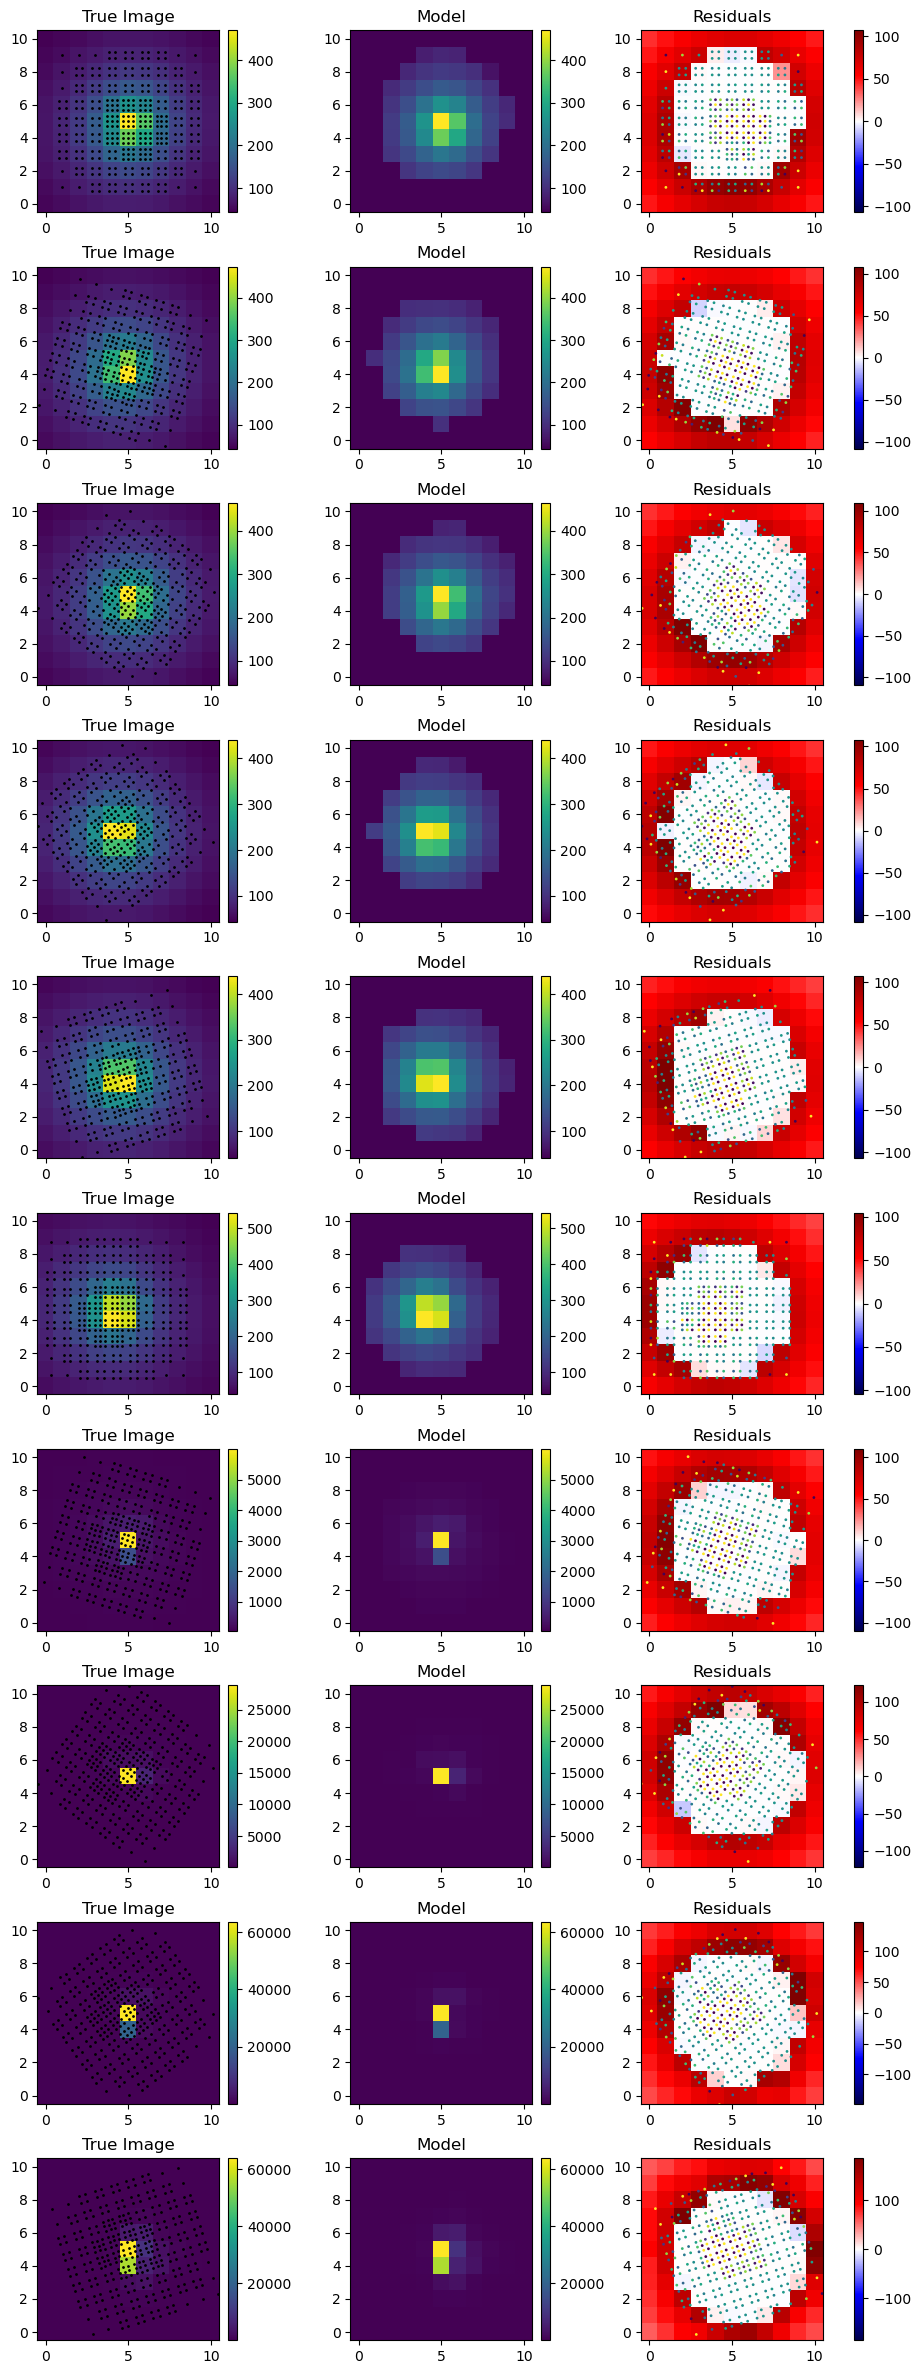

In [2]:
plot_images('simulated_Y106_analyticpsf')

In [ ]:
def plot_single_image(fileroot, imgnum, size = 11):
    imgdata = np.load('./results/images/'+str(fileroot)+'_images.npy')
    testnum = imgdata.shape[1]//size**2
    images = imgdata[0]
    sumimages = imgdata[1]
    wgt_matrix = imgdata[2]

    fluxdata = pd.read_csv('./results/lightcurves/'+str(fileroot)+'_lc.csv')
    supernova = fluxdata['true_flux']
    measured_flux = fluxdata['model_flux']


    hdul = fits.open('./results/images/'+str(fileroot)+'_wcs.fits')
    cutout_wcs_list = []
    for i,savedwcs in enumerate(hdul):
        if i == 0:
            continue
        newwcs = galsim.wcs.readFromFitsHeader(savedwcs.header)[0]
        cutout_wcs_list.append(newwcs)

    biases = []

    ra_grid, dec_grid, gridvals = np.load('./results/images/'+str(fileroot)+'_grid.npy')

    fig = plt.figure(figsize = (15,3*testnum))

    #for i, wcs in enumerate(cutout_wcs_list):

    i = imgnum

    extent = [-0.5, size-0.5, -0.5, size-0.5]
    xx, yy = cutout_wcs_list[i].toImage(ra_grid, dec_grid, units = 'deg')
    xx -= 1
    yy -= 1


    #snx, sny = wcs.toImage(snra, sndec, units = 'deg')

    plt.subplot(1, 4, 1)


    vmin = np.mean(gridvals) - np.std(gridvals)
    vmax = np.mean(gridvals) + np.std(gridvals)
    plt.scatter(xx, yy, s = 1, c= gridvals, vmin = vmin, vmax = vmax)
    plt.title('True Image ')
    #plt.scatter(snx-1, sny-1, c = 'k', s = 8, marker = '*')
    #plt.scatter(galx-1,galy-1, c = 'r', s = 8, marker = '*')
    imshow = plt.imshow(images[i*size**2:(i+1)*size**2].reshape(size,size), origin = 'lower', extent = extent)
    plt.colorbar(fraction=0.046, pad=0.04)
    trueimage = images[i*size**2:(i+1)*size**2].reshape(size,size)


    #######################################



    ############################################

    plt.subplot(1, 4, 2)
    plt.title('Model')

    im1 = sumimages[i*size**2:(i+1)*size**2].reshape(size,size)
    xx, yy = cutout_wcs_list[i].toImage(ra_grid, dec_grid, units = 'deg')


    xx -= 1
    yy -= 1

        
    vmin = np.min(images[i*size**2:(i+1)*size**2].reshape(size,size))
    vmax = np.max(images[i*size**2:(i+1)*size**2].reshape(size,size))

    im1[np.where(wgt_matrix[i*size**2:(i+1)*size**2].reshape(size,size) == 0)] = 0


    vmin = imshow.get_clim()[0]
    vmax = imshow.get_clim()[1]

    plt.imshow(im1, extent = extent, origin = 'lower', vmin = vmin, vmax = vmax)
    plt.colorbar(fraction=0.046, pad=0.04)
        



    ############################################
    plt.subplot(1,4,3)
    plt.title('Residuals')
    vmin = np.mean(gridvals) - np.std(gridvals)
    vmax = np.mean(gridvals) + np.std(gridvals)
    plt.scatter(xx,yy, s = 1, c= gridvals,  vmin = vmin, vmax = vmax)
    res = images - sumimages


        
    current_res= res[i*size**2:(i+1)*size**2].reshape(size,size)




    #if i == 0:
    norm = 3*np.std(current_res)



    plt.imshow(current_res, extent = extent, origin = 'lower', cmap = 'seismic', vmin = -norm, vmax = norm)
    #plt.imshow(wgt_matrix[i*size**2:(i+1)*size**2].reshape(size,size), extent = extent, origin = 'lower')
    plt.colorbar(fraction=0.046, pad=0.14)
    #plt.scatter(galx,galy, c = 'r', s = 12, marker = '*', edgecolors='k')
        

        



    plt.subplots_adjust(wspace = 0.4)

plot_single_image('simulated_Y106_analyticpsf', 4)

In [20]:
#Open the config yaml file
config = yaml.safe_load(open("config.yaml"))
#Change use_roman to True
config['use_roman'] = True
config['use_real_images'] = False
config['bg_gal_flux'] = 1e5
config['adaptive_grid'] = True 
config['turn_grid_off'] = False
config['source_phot_ops'] = False
config['testnum'] = 20
config['detim'] = 10
config['mismatch_seds'] = False
config['source_phot_ops'] = False
config['SNID'] = 50106142

#Save the result
with open("config.yaml", "w") as f:
    yaml.dump(config, f)

%run -i 'RomanASP.py'

Running the main function
All Configurations Loaded
ID: 50106142
ARGS IN PSF SOURCE 1990.219973762475 185.08831190626097 662 11 19 10.219973762474979 10.08831190626097 galsim.SED(galsim.LookupTable(x=array([ 100., 2600.]), f=array([1., 1.]), interpolant='linear'), redshift=0.0) 927.5700159000776
ARE YOU SURE YOU WANT TO DO THIS?
ARGS IN PSF SOURCE 1418.3428160911772 292.6512417736026 662 11 19 10.34281609117727 9.651241773602578 galsim.SED(galsim.LookupTable(x=array([ 100., 2600.]), f=array([1., 1.]), interpolant='linear'), redshift=0.0) 2709.657532460304
ARE YOU SURE YOU WANT TO DO THIS?
ARGS IN PSF SOURCE 907.6860885744691 571.6941477442845 662 11 19 9.686088574469068 9.694147744284464 galsim.SED(galsim.LookupTable(x=array([ 100., 2600.]), f=array([1., 1.]), interpolant='linear'), redshift=0.0) 6714.427015067244
ARE YOU SURE YOU WANT TO DO THIS?
ARGS IN PSF SOURCE 508.2517075750625 994.907312402865 662 11 19 10.251707575062483 9.907312402865045 galsim.SED(galsim.LookupTable(x=array([

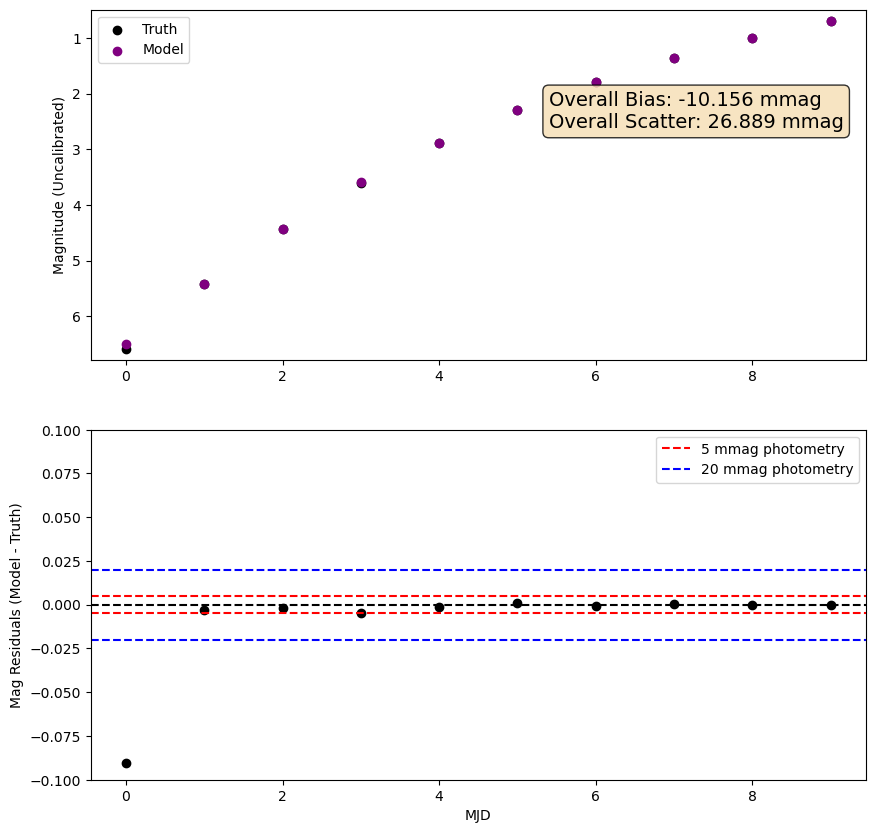

In [21]:
plot_lc('simulated_Y106_romanpsf')

In [ ]:
ra,dec,vals = np.load('results/images/withsn.npy')
oldra, olddec, oldvals = np.load('results/images/nosn.npy')

nps_ra, nps_dec, nps_vals = np.load('results/images/simulated_Y106_romanpsf_grid.npy')
plt.plot(vals)
plt.plot(oldvals)
plt.plot(nps_vals)
plt.ylim(-1000,1000)


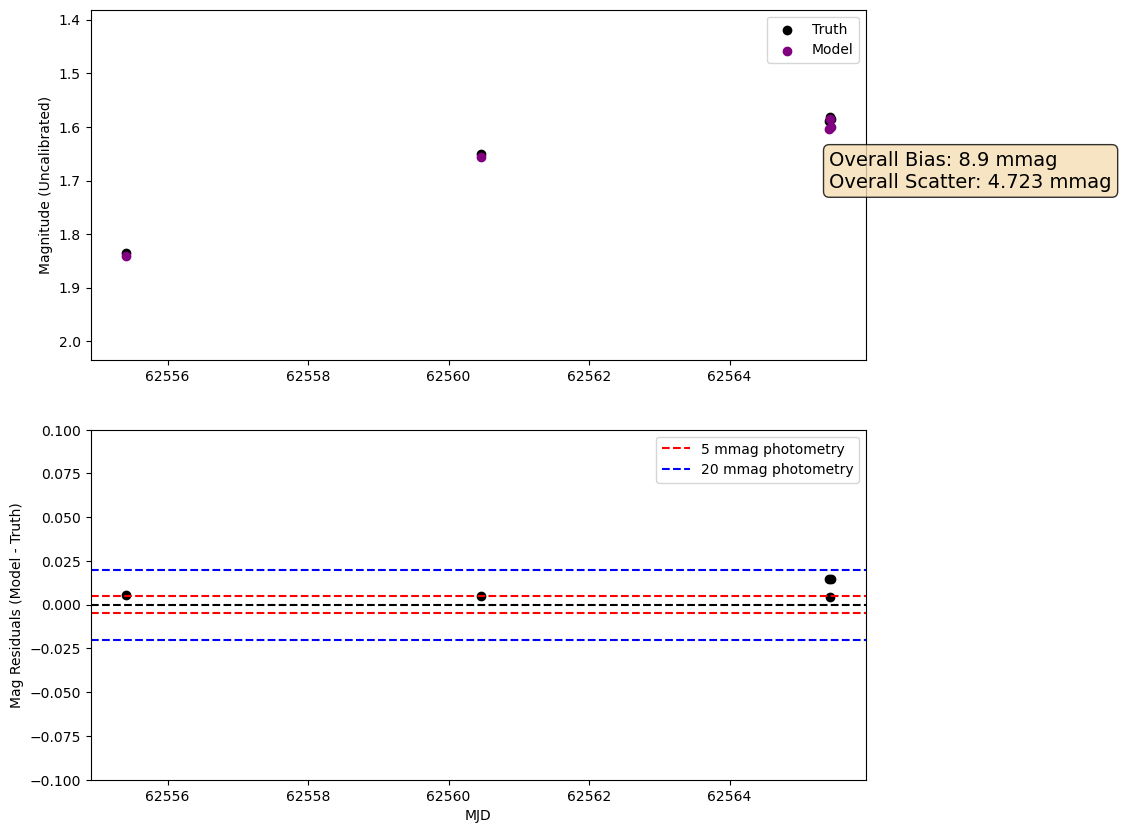

In [5]:
plot_lc('50106142_Y106_romanpsf')

In [8]:
#7/0 same performance
#14/0 3x worse
#21/0 2x worse

#15/5 Noise is back!

#1/1 no bg --> looks fine? error on order 1e-3

#This might have not been the best metric

In [4]:
data = np.array([20, 100, 40])
model = np.array([1, 5, 2])
error = np.array([3,0,9])
deltaf = np.sum(error)/np.sum(model)
print(deltaf)

def chi2(flux, data, model, error):
    return np.sum((np.array(data) + error - flux*np.array(model))**2 / np.array(model))

#minimize
from scipy.optimize import minimize
res = minimize(chi2, 1, args=(data, model, error))
print(res.x)

1.5
[21.50000035]


ARGS IN PSF SOURCE 2000 2000 502 13 11 5 5 galsim.SED(galsim.LookupTable(x=array([ 100., 2600.]), f=array([1., 1.]), interpolant='linear'), redshift=0.0) 1000
Using 1e7 photons in getPSF_Image
ARGS IN PSF SOURCE 2000 2000 502 13 11 5 5 galsim.SED(galsim.LookupTable(x=array([ 100., 2600.]), f=array([0., 1.]), interpolant='linear'), redshift=0.0) 1
Using 1e7 photons in getPSF_Image
[0.00605913]
ARGS IN PSF SOURCE 2000 2000 502 13 11 5 5 galsim.SED(galsim.LookupTable(x=array([ 100., 2600.]), f=array([1., 1.]), interpolant='linear'), redshift=0.0) 1000
Using 1e7 photons in getPSF_Image
ARGS IN PSF SOURCE 2000 2000 502 13 11 5 5 galsim.SED(galsim.LookupTable(x=array([ 100., 2600.]), f=array([0., 1.]), interpolant='linear'), redshift=0.0) 1
Using 1e7 photons in getPSF_Image
[0.00515328]
ARGS IN PSF SOURCE 2000 2000 502 13 11 5 5 galsim.SED(galsim.LookupTable(x=array([ 100., 2600.]), f=array([1., 1.]), interpolant='linear'), redshift=0.0) 1000
Using 1e7 photons in getPSF_Image
ARGS IN PSF SOU

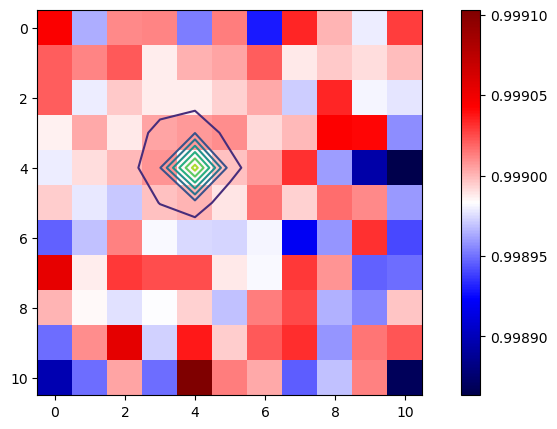

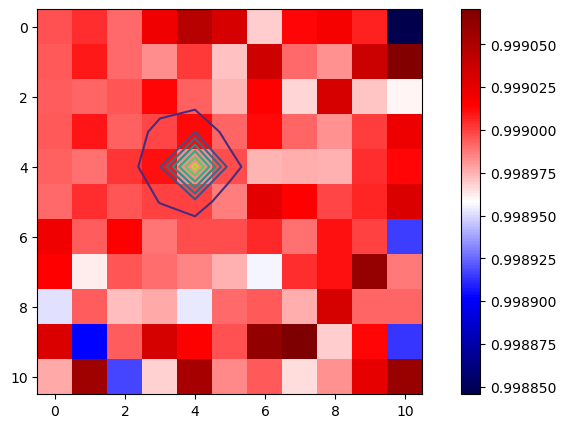

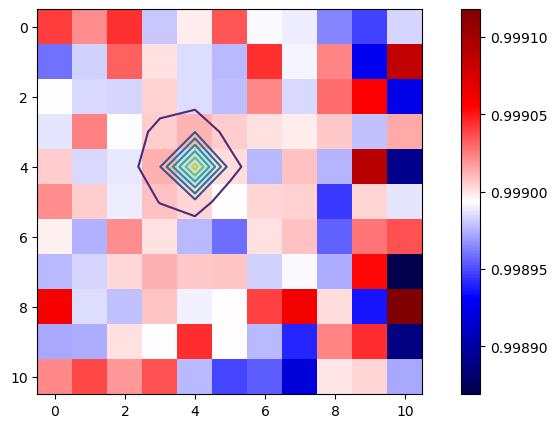

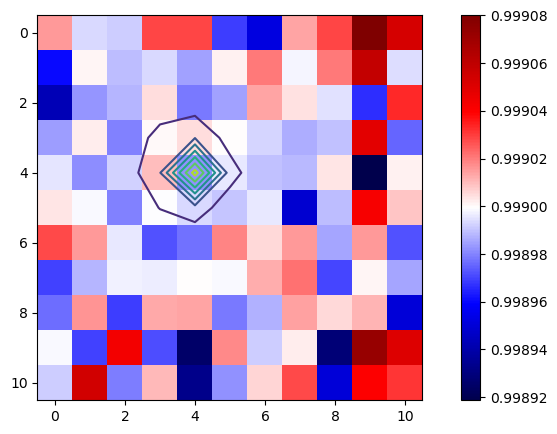

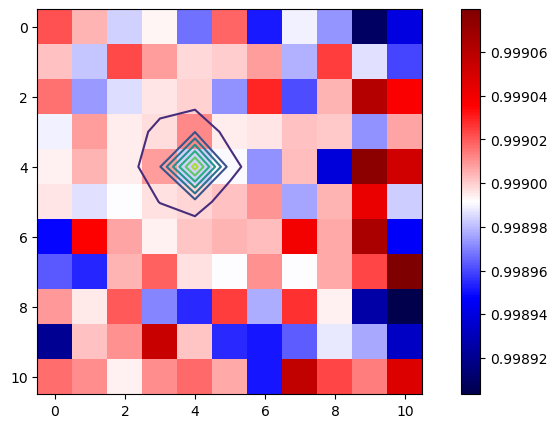

In [14]:
from scipy.optimize import minimize

config_file = './temp_tds.yaml'
pointing = 662
SCA = 11
util_ref = roman_utils(config_file=config_file, visit = pointing, sca=SCA)
stampsize = 11
x =2000
y = 2000
x_center = 5
y_center = 5
#a = getPSF_Image(util_ref, stampsize, x=x, y=y,  x_center = x_center, y_center=y_center,include_photonOps=True).array
#b = getPSF_Image(util_ref, stampsize, x=x, y=y,  x_center = x_center, y_center=y_center,include_photonOps=True).array
sed = galsim.SED(galsim.LookupTable([100, 2600], [1,1], interpolant='linear'),
                            wave_type='nm', flux_type='fphotons')

sed2 = galsim.SED(galsim.LookupTable([100, 2600], [0,1], interpolant='linear'),
                            wave_type='nm', flux_type='fphotons')
'''
newwcs = util_ref.getWCS()

bpass = util_ref.getBandpass()

stamp = galsim.Image(stampsize, stampsize, wcs = newwcs)
point = galsim.DeltaFunction()
point *= sed
point = point.withFlux(1,bpass)

apsf = galsim.roman.getPSF(1,'Y106', pupil_bin=8, wcs = newwcs)
convolvedpsf = galsim.Convolve(point, apsf)
a = convolvedpsf.drawImage(bpass, method='no_pixel',\
                center = galsim.PositionD(x_center, y_center),use_true_center = True, image = stamp, wcs = newwcs).array


bpsf = galsim.roman.getPSF(1,'Y106', pupil_bin=8, wcs = newwcs)
convolvedpsf = galsim.Convolve(point, bpsf)
b = convolvedpsf.drawImage(bpass, method='no_pixel',\
                center = galsim.PositionD(x_center, y_center),use_true_center = True, image = stamp, wcs = newwcs).array
'''
pointing = 502
SCA = 13

errors = []
for i in range(5):
    testflux = 1000
    a = construct_psf_source(2000, 2000, pointing, SCA, stampsize=11,  x_center = 5, y_center = 5, sed = sed, flux = testflux, photOps = True)
    b = construct_psf_source(2000, 2000, pointing, SCA, stampsize=11,  x_center = 5, y_center = 5, sed = sed2, flux = 1, photOps = True)

    def chi2(flux, data, model):
        return np.sum((np.array(data) - flux*np.array(model))**2 / np.array(model))

    res = minimize(chi2, 2, args=(a,b))
    print(-2.5 * (np.log10(res.x*1) - np.log10(testflux)))
    plt.figure(figsize=(10,5))
    plt.imshow((a-b).reshape(11,11)/a.reshape(11,11), cmap = 'seismic')
    plt.colorbar()
    plt.contour(a.reshape(11,11))
    errors.append(-2.5 * (np.log10(res.x*1) - np.log10(testflux)))

In [15]:
print(np.mean(errors))
print(np.std(errors))

0.005884737077243907
0.0013765993183682773


In [2]:
#Open the config yaml file
config = yaml.safe_load(open("config.yaml"))
#Change use_roman to True
config['use_roman'] = True
config['use_real_images'] = True
config['adaptive_grid'] = True 
config['turn_grid_off'] = False
config['source_phot_ops'] = True
config['testnum'] = 10
config['detim'] = 5


#Save the result
with open("config.yaml", "w") as f:
    yaml.dump(config, f)

%run -i 'RomanASP.py'

Running the main function
All Configurations Loaded
ID: 30666595
filter Pointing SCA     date    ...  true mag  true flux  realized flux BAND
------ -------- --- ----------- ... ---------- ---------- ------------- ----
  Y106     1658  10  62020.4368 ...         --         --            -- Y106
  Y106     1653  12   62020.411 ...         --         --            -- Y106
  Y106      502  13 62005.43251 ...         --         --            -- Y106
  Y106      887  18  62010.4325 ...         --         --            -- Y106
  Y106     2043  18  62025.4368 ...         --         --            -- Y106
  Y106    34423   2   62445.644 ... 6.93858786 1713.89311        1751.0 Y106
  Y106    34418   7   62445.618 ... 6.93809558 1714.67038        1640.0 Y106
  Y106    34033   8   62440.618 ... 6.89632937 1781.91559        1870.0 Y106
  Y106    34813  13   62450.669 ... 6.97590868 1655.98121        1674.0 Y106
  Y106    34039  16   62440.648 ... 6.89640159 1781.79707        1742.0 Y106
truth in co

In [ ]:
#USING THE INPUTS FOR CONSTRUCT PSF SOURCE THAT I USE IN A REAL RUN MAKE RESIDUALS WAY WORSE, WHAT'S THE CAUSE?
#Default: 6 mmag
#Changing x_center and y_center (cutout locs) to integers 6 mmag
#Changing x and y (SCA loc) to integers 6 mmag
#changing y from 3902 to 2000 to see if the edge effect is the issue: 6 mmag
#Switching SCA 13 to SCA 1: 5 mmag 
#Going back to 

In [4]:
df = open_parq(10430, path = sn_path)
reals = df.loc[(df.peak_mjd < 62800.0)]
reals = reals.loc[(df.peak_mjd > 62400.0)]
reals = reals.loc[reals.host_mag_F < 999]
#reals = reals.loc[reals.ra > 6.487]
reals = reals.loc[reals.ra > 7]
#reals = reals.loc[reals.ra < 12.51]
reals = reals.loc[reals.ra < 8]
#reals = reals.loc[reals.dec > -46.877]
reals = reals.loc[reals.dec > -45]
#reals = reals.loc[reals.dec < -41.124]
reals = reals.loc[reals.dec < -44]
df = reals
df = df.sort_values('peak_mag_F')

In [4]:
from roman_imsim import SkyCatalogInterface
import skycatalogs
from roman_imsim.utils import roman_utils


band = 'Y106'
p = 34423
s = 2
config_file = './temp_tds.yaml'
roman_path = '/hpc/group/cosmology/OpenUniverse2024'

file = roman_path+f'/RomanTDS/truth/{band}/{p}/Roman_TDS_index_{band}_{p}_{s}.txt'
util_ref = roman_utils(config_file=config_file, visit = p, sca=s)

print(file)
sci = SkyCatalogInterface(file, exptime = 900, wcs = util_ref.getWCS())
sci.getObj(1)
#sci.getApproxNObjects()

/hpc/home/cfm37/miniconda3/envs/ImSimTest/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


/hpc/group/cosmology/OpenUniverse2024/RomanTDS/truth/Y106/34423/Roman_TDS_index_Y106_34423_2.txt


AttributeError: 'str' object has no attribute 'keys'

In [2]:
from roman_imsim.utils import roman_utils

In [ ]:
from skycatalogs import skyCatalogs


In [21]:
skycatalogs.utils.PolygonalRegion

skycatalogs.utils.shapes.PolygonalRegion

In [22]:
skyCatalogs.utils.PolygonalRegion

AttributeError: module 'skycatalogs.skyCatalogs' has no attribute 'utils'

In [23]:
skyCatalogs.PolygonalRegion

AttributeError: module 'skycatalogs.skyCatalogs' has no attribute 'PolygonalRegion'

In [10]:
from skycatalogs.skyCatalogs import open_catalog

skycatalog_root = roman_path + f'/RomanTDS/truth/{band}/{p}/Roman_TDS_index_{band}'
config_file = "./temp_tds.yaml"

cat = open_catalog(config_file, skycatalog_root=skycatalog_root)

KeyError: 'root_directory'

10430
             The closest SED is 86.0 days away.


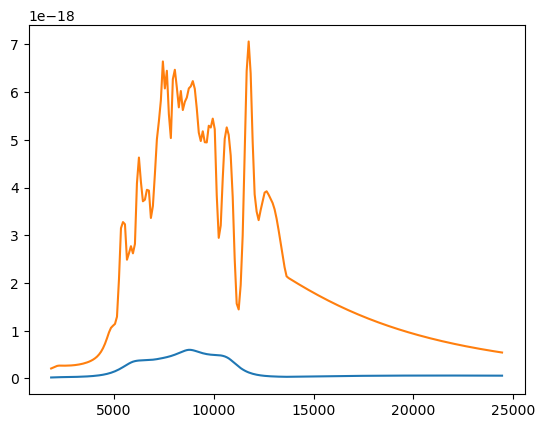

In [34]:


#
#def find_hdf5(ID, path = '/hpc/group/cosmology/OpenUniverse2024/roman_rubin_cats_v1.1.2_faint/')


import h5py
print(find_parq(50106142))
filename = sn_path + 'snana_' + str(10430) + '.hdf5'
h5 = h5py.File(filename,'r')

h5 = h5['50106142']
'''
for key in h5.keys():
    print(key, h5[key].shape)
'''
lam = h5['lambda']
flambda = h5['flambda']
mjd = h5['mjd']


def get_SED(SNID, date):
    filenum = find_parq(SNID)
    filename = sn_path + 'snana_' + str(filenum) + '.hdf5'
    h5 = h5py.File(filename,'r')
    h5 = h5[str(SNID)]
    lam = h5['lambda']
    flambda = h5['flambda']
    mjd = h5['mjd']

    bestindex = np.argmin(np.abs(np.array(mjd) - date))
    if np.min(np.abs(np.array(mjd) - date)) > 10:
        print('WARNING: No SED data within 10 days of date. \n \
            The closest SED is ' + str(np.min(np.abs(np.array(mjd) - date))) + ' days away.')
    return np.array(lam), np.array(flambda[bestindex])

plt.plot(*get_SED(50106142, 62900))
plt.plot(*get_SED(50106142, 62600))
